In [1]:
import sys
!{sys.executable} -m pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Garima\Downloads\anomaly-detection-in-4g-cellular-networks\Dataset_AnomalyDetection.csv",sep=";")

In [3]:
df

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21:30,6ALTE,7.5790,0.8080,0.1640,0.0370,7.9800,0.3750,1.1010,0.0100,4,3,7,0
36900,9:45,8CLTE,9.0950,1.2130,0.1890,0.0300,19.5100,1.5830,1.1220,1.0310,4,2,6,0
36901,13:30,9BLTE,4.5128,0.9309,0.3475,0.0311,12.6148,0.5500,1.1407,1.0220,4,4,8,1
36902,12:30,3CLTE,13.3390,2.7280,0.5590,0.0650,28.1870,0.8940,1.2230,1.0610,5,4,9,0



### **DATA PREPROCESSING**




In [4]:
df.shape

(36904, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36904 non-null  int64  
 11  maxUE_UL     36904 non-null  int64  
 12  maxUE_UL+DL  36904 non-null  int64  
 13  Unusual      36904 non-null  int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 3.9+ MB


In [6]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000
mean,7.897706,2.124434,0.565398,0.068173,17.926552,1.808755,1.184777,0.671641,4.320345,3.124648,7.444992,0.275932
std,8.472748,2.261744,0.733322,0.187839,15.870278,5.078689,0.213374,0.540480,1.785513,1.402753,3.051653,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.142000,0.021800,5.770650,0.366850,1.052000,0.010000,3.000000,2.000000,5.000000,0.000000
50%,4.547000,1.379150,0.356000,0.040000,14.304000,0.711000,1.132000,1.011000,4.000000,3.000000,7.000000,0.000000
75%,12.328000,2.826900,0.725000,0.075000,25.291750,1.252100,1.273000,1.068700,5.000000,4.000000,9.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,148.478500,49.690600,3.035400,2.668000,13.000000,12.000000,24.000000,1.000000


In [7]:
df.isna().sum()

Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

In [8]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PRBUsageUL
PRBUsageDL
meanThr_DL
meanThr_UL
maxThr_DL
maxThr_UL
meanUE_DL
meanUE_UL
maxUE_DL
maxUE_UL
maxUE_UL+DL
Unusual


In [9]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Time
CellName


In [10]:
df_en = df.copy()
df_en.drop("Time",axis=1,inplace=True)
df_en.drop("CellName",axis=1,inplace=True)

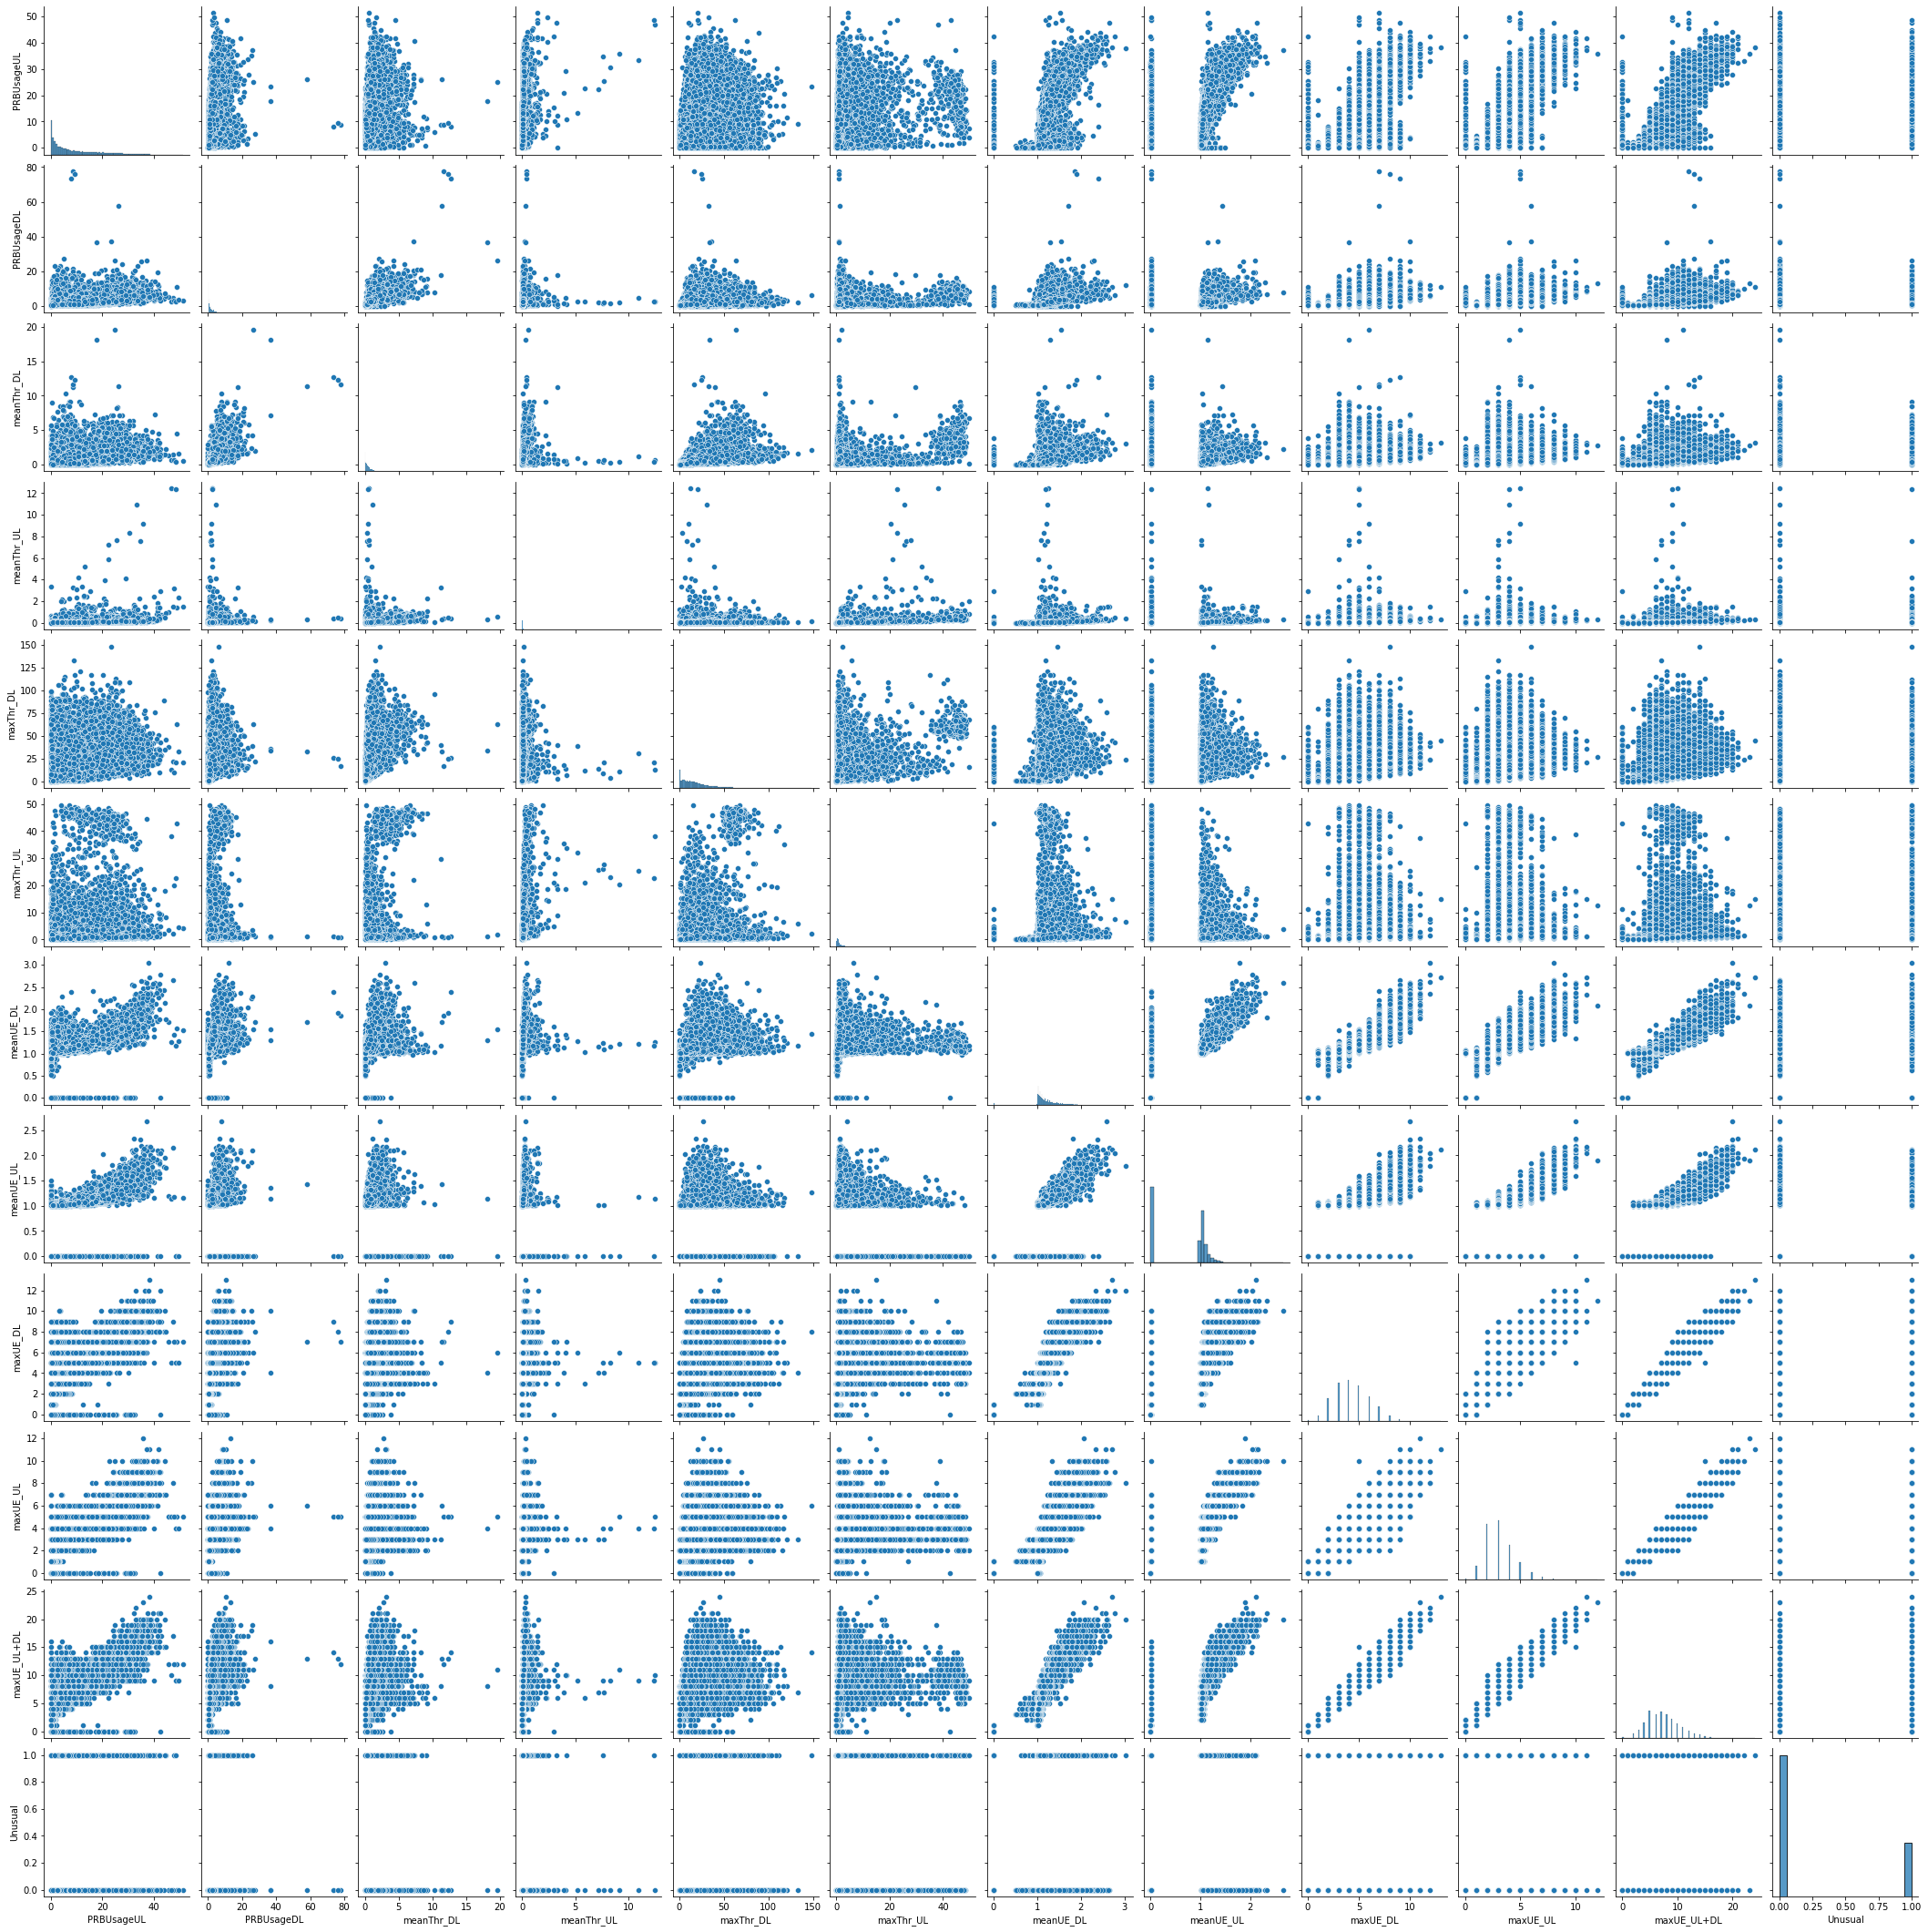

In [11]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='PRBUsageUL', ylabel='PRBUsageDL'>

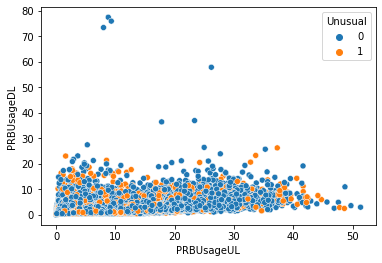

In [12]:
sns.scatterplot(x="PRBUsageUL",y="PRBUsageDL",hue="Unusual",data=df)

<AxesSubplot:xlabel='meanThr_UL', ylabel='meanThr_DL'>

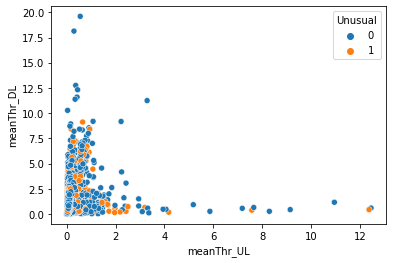

In [13]:
sns.scatterplot(x="meanThr_UL",y="meanThr_DL",hue="Unusual",data=df)

<AxesSubplot:xlabel='maxThr_UL', ylabel='maxThr_DL'>

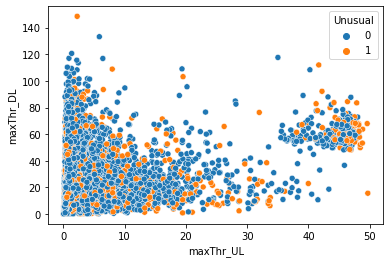

In [14]:
sns.scatterplot(x="maxThr_UL",y="maxThr_DL",hue="Unusual",data=df)

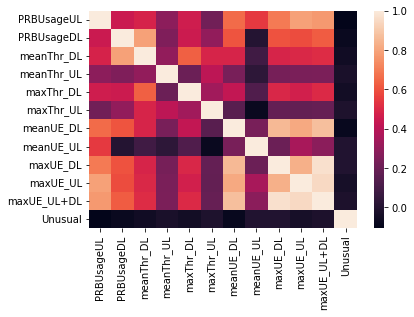

In [15]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

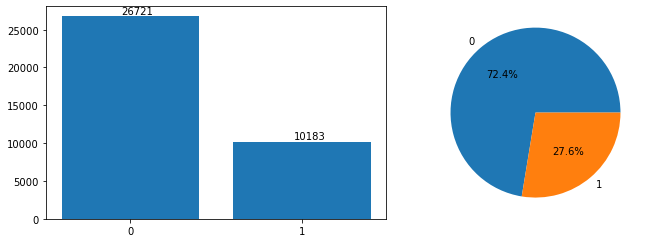

In [16]:
y = df['Unusual']

# Check value distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
axes[0].bar(["0", "1"],y.value_counts())
for i, v in enumerate(y.value_counts()):
    axes[0].text(i-0.05, v+300, str(v))
axes[1].pie(y.value_counts(), labels=["0", "1"],
            autopct='%1.1f%%')
fig.tight_layout()

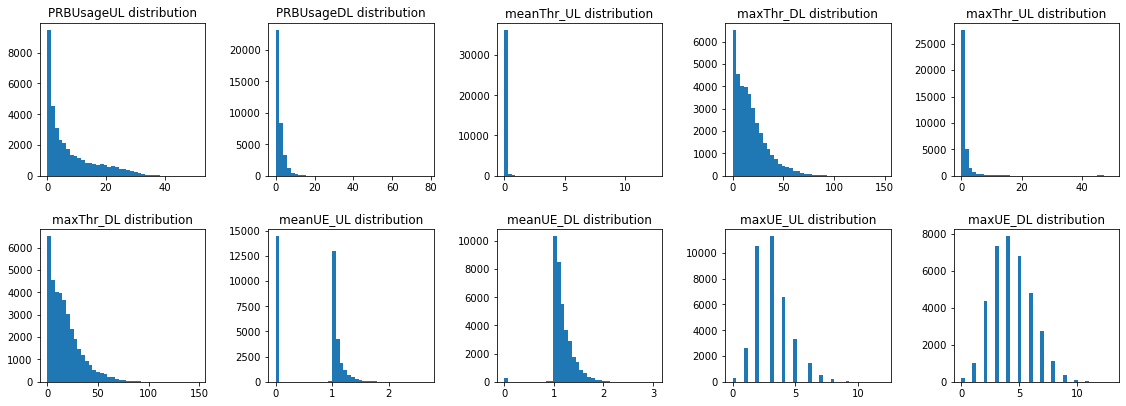

In [17]:
import warnings
warnings.filterwarnings('ignore')

float_v = list(df.select_dtypes(include=['float64']).columns)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7,  ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(16,6))
axs='ax'+str(i+1)

ax1.hist(df.PRBUsageUL, bins=40)
ax1.set_title('PRBUsageUL distribution')
ax2.hist(df.PRBUsageDL, bins=40)
ax2.set_title('PRBUsageDL distribution')

ax3.hist(df.meanThr_UL, bins=40)
ax3.set_title('meanThr_UL distribution')
ax4.hist(df.maxThr_DL, bins=40)
ax4.set_title('maxThr_DL distribution')

ax5.hist(df.maxThr_UL, bins=40)
ax5.set_title('maxThr_UL distribution')
ax6.hist(df.maxThr_DL, bins=40)
ax6.set_title('maxThr_DL distribution')

ax7.hist(df.meanUE_UL, bins=40)
ax7.set_title('meanUE_UL distribution')
ax8.hist(df.meanUE_DL, bins=40)
ax8.set_title('meanUE_DL distribution')

ax9.hist(df.maxUE_UL, bins=40)
ax9.set_title('maxUE_UL distribution')
ax10.hist(df.maxUE_DL, bins=40)
ax10.set_title('maxUE_DL distribution')
fig.tight_layout(pad=2.0)
plt.show()

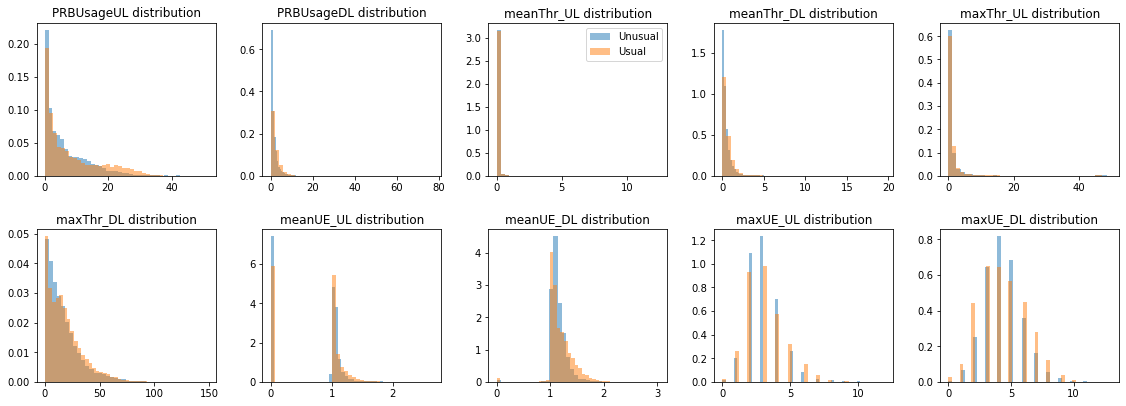

In [18]:
import warnings
warnings.filterwarnings('ignore')

float_v = list(df.loc[df['Unusual']==1].select_dtypes(include=['float64']).columns)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7,  ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(16,6))
axs='ax'+str(i+1)

ax1.hist(df.loc[df['Unusual']==1].PRBUsageUL, alpha=0.5, bins=40, density=True, label='Unusual')
ax1.hist(df.loc[df['Unusual']==0].PRBUsageUL, alpha=0.5, bins=40, density=True, label='Usual')
ax1.set_title('PRBUsageUL distribution')
ax2.hist(df.loc[df['Unusual']==1].PRBUsageDL, alpha=0.5, bins=40, density=True, label='Unusual')
ax2.hist(df.loc[df['Unusual']==0].PRBUsageDL, alpha=0.5, bins=40, density=True, label='Usual')
ax2.set_title('PRBUsageDL distribution')

ax3.hist(df.loc[df['Unusual']==1].meanThr_UL, alpha=0.5, bins=40, density=True, label='Unusual')
ax3.hist(df.loc[df['Unusual']==0].meanThr_UL, alpha=0.5, bins=40, density=True, label='Usual')
ax3.set_title('meanThr_UL distribution')
ax4.hist(df.loc[df['Unusual']==1].meanThr_DL, alpha=0.5, bins=40, density=True, label='Unusual')
ax4.hist(df.loc[df['Unusual']==0].meanThr_DL, alpha=0.5, bins=40, density=True, label='Usual')
ax4.set_title('meanThr_DL distribution')

ax5.hist(df.loc[df['Unusual']==1].maxThr_UL, alpha=0.5, bins=40, density=True, label='Unusual')
ax5.hist(df.loc[df['Unusual']==0].maxThr_UL, alpha=0.5, bins=40, density=True, label='Usual')
ax5.set_title('maxThr_UL distribution')

ax6.hist(df.loc[df['Unusual']==1].maxThr_DL, alpha=0.5, bins=40, density=True, label='Unusual')
ax6.hist(df.loc[df['Unusual']==0].maxThr_DL, alpha=0.5, bins=40, density=True, label='Usual')
ax6.set_title('maxThr_DL distribution')

ax7.hist(df.loc[df['Unusual']==1].meanUE_UL, alpha=0.5, bins=40, density=True, label='Unusual')
ax7.hist(df.loc[df['Unusual']==0].meanUE_UL, alpha=0.5, bins=40, density=True, label='Usual')
ax7.set_title('meanUE_UL distribution')
ax8.hist(df.loc[df['Unusual']==1].meanUE_DL, alpha=0.5, bins=40, density=True, label='Unusual')
ax8.hist(df.loc[df['Unusual']==0].meanUE_DL, alpha=0.5, bins=40, density=True, label='Usual')
ax8.set_title('meanUE_DL distribution')

ax9.hist(df.loc[df['Unusual']==1].maxUE_UL, alpha=0.5, bins=40, density=True, label='Unusual')
ax9.hist(df.loc[df['Unusual']==0].maxUE_UL, alpha=0.5, bins=40, density=True, label='Usual')
ax9.set_title('maxUE_UL distribution')
ax10.hist(df.loc[df['Unusual']==1].maxUE_DL, alpha=0.5, bins=40, density=True, label='Unusual')
ax10.hist(df.loc[df['Unusual']==0].maxUE_DL, alpha=0.5, bins=40, density=True, label='Usual')
ax10.set_title('maxUE_DL distribution')
fig.tight_layout(pad=2.0)
ax3.legend(loc="best")
plt.show()

<AxesSubplot:>

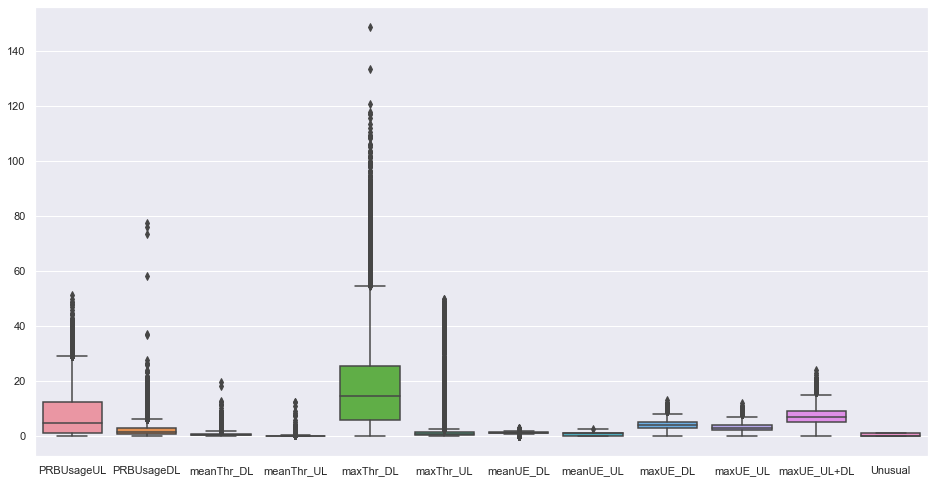

In [19]:
#box plot for outlier detection
sns.set(rc={'figure.figsize':(16,8.27)})
fig.tight_layout()
sns.boxplot(data=df)

Text(0.5, 1.0, 'Anomaly Detection using unusual label')

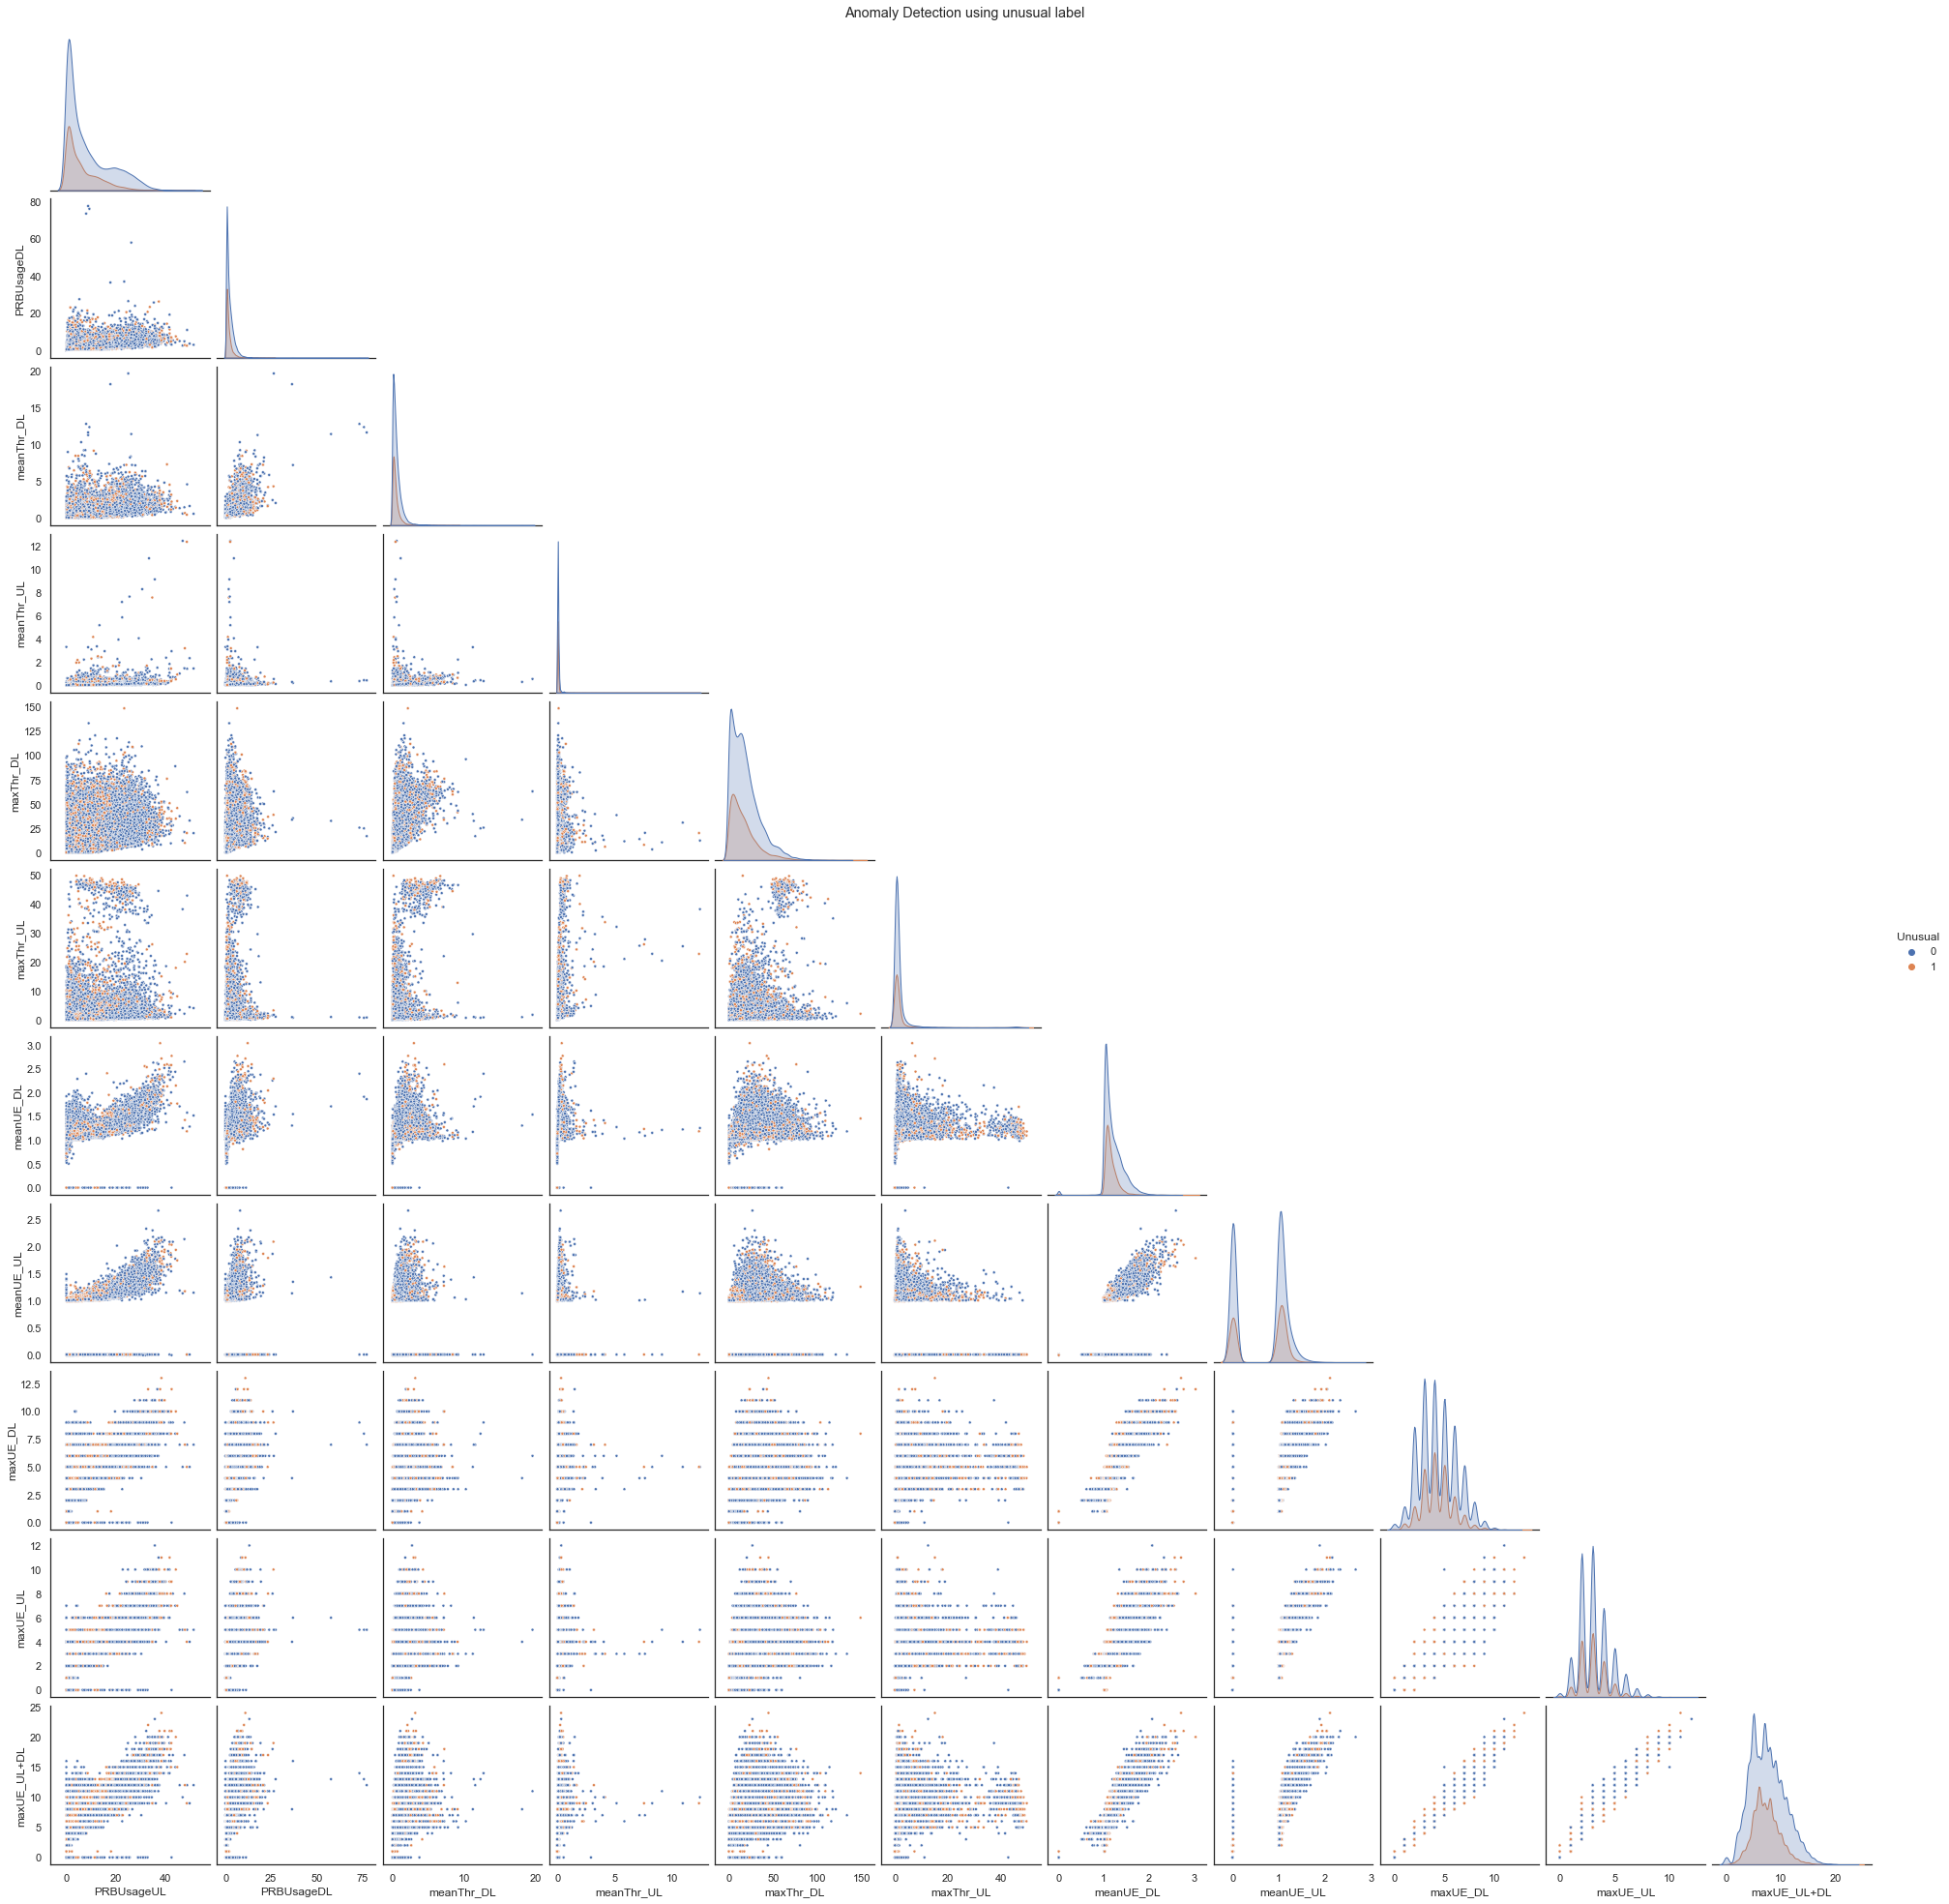

In [20]:
#Anomaly Detection using unusual label
sns.set(style="white")

#Draw the heatmap with the mask and correct aspect ratio:
ax = sns.pairplot(df, hue = 'Unusual', markers='.', corner=True);
ax.fig.suptitle("Anomaly Detection using unusual label", y=1.0)

### **BUILDING MACHINE LEARNING MODEL**

In [21]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradiant Boosting": GradientBoostingClassifier(),
    "XGB": XGBClassifier()
}
# Create a function to fit and score model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_scores = {}
    # Loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)
        #Evalute the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [22]:
# Split the data
X = df_en.drop("Unusual",axis=1)
y = df_en["Unusual"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

<AxesSubplot:>

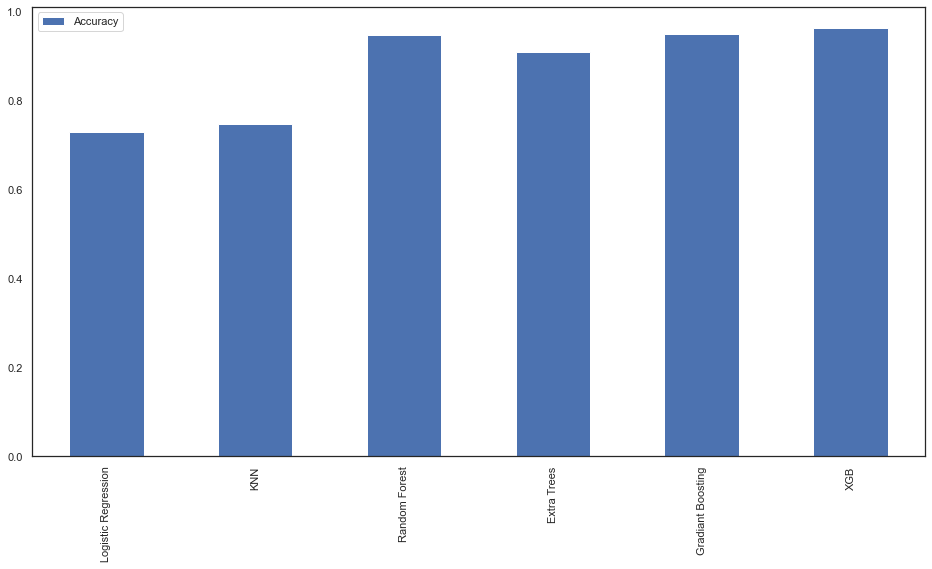

In [25]:
model_compare = pd.DataFrame(scores,index=["Accuracy"])
model_compare.T.plot.bar()

In [26]:
scores

{'Logistic Regression': 0.728898523235334,
 'KNN': 0.7481371087928465,
 'Random Forest': 0.9470261482183986,
 'Extra Trees': 0.9099038070722124,
 'Gradiant Boosting': 0.9500067741498442,
 'XGB': 0.9623357268662783}


### **SCORES**




In [27]:
from sklearn.metrics import classification_report
ideal_model = XGBClassifier()
ideal_model.fit(X_train,y_train)
preds = ideal_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5366
           1       0.98      0.88      0.93      2015

    accuracy                           0.96      7381
   macro avg       0.97      0.94      0.95      7381
weighted avg       0.96      0.96      0.96      7381




### **FEATURE IMPORTANCE**




[0.1046363  0.08087574 0.01600438 0.022445   0.01279482 0.01420948
 0.04009528 0.537278   0.06276302 0.05442201 0.05447594]


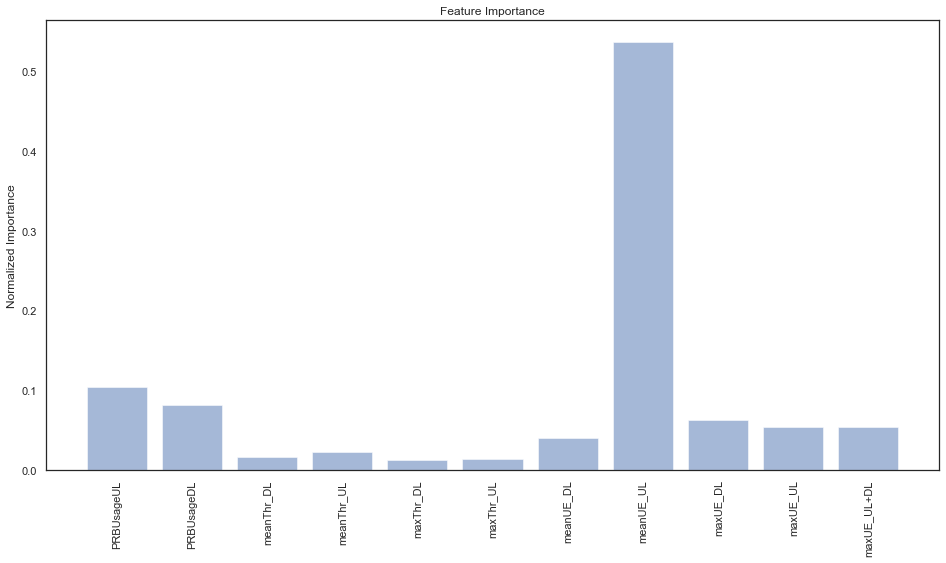

In [28]:
  feature_importances = ideal_model.feature_importances_
  columns = df.columns
  columns=['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL',
           'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL',
       'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']
  print(feature_importances)

  fig = plt.figure()
  plt.bar(np.arange(11) , feature_importances, align='center', alpha=0.5)
  plt.xticks(np.arange(11), columns, rotation='vertical')
  plt.ylabel('Normalized Importance')
  plt.title('Feature Importance')
  plt.show()

Among all the other columns, ‘meanUE_UL’ has the highest value of feature importance. This shows that this column is most likely to generate anomalies in the network